# Padrão

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.lines import Line2D

In [237]:
def Indentificar_outliers(data):
    # Carregue os dados em um DataFrame 
    # Calcule a matriz de covariância
    cov_matrix = np.cov(data.values.T)

    # Calcule a matriz inversa da matriz de covariância
    inv_cov_matrix = np.linalg.inv(cov_matrix)

    # Calcule o centro dos dados (média das colunas)
    center = np.mean(data.values, axis=0)

    # Calcule a distância Mahalanobis para cada ponto
    distances = []
    for point in data.values:
        diff = point - center
        distance = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))
        distances.append(distance)

    # Calcule o limite de corte usando a distribuição qui-quadrado
    alpha = 0.05 # nível de significância
    df = len(data.columns) # graus de liberdade
    cut_off = chi2.ppf(1 - alpha, df)

    # Identifique os outliers
    outliers = data[distances > np.sqrt(cut_off)]
    return outliers


In [238]:
df = pd.read_excel('fadiga-exercicio.xlsx')
df

,p200,p4,p38,p34,p200.1,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
0,0.051,0.544,0.261,0.056,0.440000,0.0370,0.140000,0.710000,0.000184,0.701,2.000000e+07,-1.364,3.090,1
1,0.050,0.564,0.341,0.067,0.714741,0.0365,0.135000,0.700000,0.000108,0.752,2.000000e+09,-1.968,3.075,1
2,0.055,0.503,0.208,0.000,0.533247,0.0400,0.148000,0.725000,0.000119,0.744,5.000000e+06,-1.276,3.202,1
3,0.055,0.509,0.295,0.000,0.313309,0.0400,0.148000,0.740000,0.000167,0.737,4.000000e+07,-1.508,3.212,1
4,0.051,0.544,0.261,0.056,0.561052,0.0390,0.142000,0.730000,0.000240,0.664,2.000000e+08,-1.674,3.645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.062,0.483,0.279,0.000,NaN,0.0588,0.181056,0.779494,0.001350,0.531,4.480000e+07,-1.436,3.231,1
91,0.055,0.509,0.295,0.000,NaN,0.0392,0.143000,0.730000,0.000146,0.700,2.000000e+07,-1.318,3.712,1
92,0.051,0.544,0.261,0.056,NaN,0.0390,0.149100,0.715500,0.000256,0.663,2.590000e+05,-0.926,3.561,3
93,0.050,0.564,0.341,0.067,NaN,0.0380,0.143300,0.710800,0.000260,0.690,4.000000e+09,-1.904,3.695,1


In [239]:
# a variavel p200.1 só possui 32 valores não nulos, ou seja, aproximademente um terço das outras variáveis.
# Sendo assim, podemos considerar que ela pode ser descartada.
display(df.describe())
print(df.info())

,p200,p4,p38,p34,p200.1,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
count,95.000000,94.000000,94.000000,94.000000,32.000000,94.000000,93.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,95.000000,95.000000
mean,0.051681,0.489612,0.221250,0.016491,0.502629,0.049441,0.153262,0.734454,0.000596,0.682043,1.489216e+09,-1.365926,3.270937,1.957895
std,0.011570,0.070073,0.096437,0.026803,0.244166,0.007169,0.012065,0.029814,0.001043,0.121335,1.268584e+10,0.230440,0.339035,0.770683
min,0.032000,0.253520,0.017455,0.000000,0.007157,0.036500,0.131300,0.645600,0.000002,0.406000,4.700000e+04,-2.342000,2.600000,1.000000
25%,0.042431,0.456300,0.160000,0.000000,0.323354,0.045000,0.145000,0.716625,0.000140,0.609500,2.992500e+06,-1.435250,3.025000,1.000000
50%,0.054000,0.500000,0.217943,0.006000,0.517102,0.050000,0.152000,0.739000,0.000251,0.687000,7.330000e+06,-1.339000,3.200000,2.000000
75%,0.056850,0.543000,0.295000,0.017000,0.691421,0.055000,0.162000,0.749800,0.000593,0.751500,2.015000e+07,-1.231000,3.571500,3.000000
max,0.085231,0.617262,0.464000,0.167271,0.964402,0.073000,0.192000,0.870000,0.006330,1.080000,1.230000e+11,-0.818000,4.341000,3.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   p200    95 non-null     float64
 1   p4      94 non-null     float64
 2   p38     94 non-null     float64
 3   p34     94 non-null     float64
 4   p200.1  32 non-null     float64
 5   Teor    94 non-null     float64
 6   VMA     93 non-null     float64
 7   VFA     94 non-null     float64
 8   C11     94 non-null     float64
 9   C12     94 non-null     float64
 10  Gamma   94 non-null     float64
 11  Delta   94 non-null     float64
 12  Alpha   95 non-null     float64
 13  Classe  95 non-null     int64  
dtypes: float64(13), int64(1)
memory usage: 10.5 KB
None


In [240]:
df2 = df.drop(columns= ['p200.1'])
df2

,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
0,0.051,0.544,0.261,0.056,0.0370,0.140000,0.710000,0.000184,0.701,2.000000e+07,-1.364,3.090,1
1,0.050,0.564,0.341,0.067,0.0365,0.135000,0.700000,0.000108,0.752,2.000000e+09,-1.968,3.075,1
2,0.055,0.503,0.208,0.000,0.0400,0.148000,0.725000,0.000119,0.744,5.000000e+06,-1.276,3.202,1
3,0.055,0.509,0.295,0.000,0.0400,0.148000,0.740000,0.000167,0.737,4.000000e+07,-1.508,3.212,1
4,0.051,0.544,0.261,0.056,0.0390,0.142000,0.730000,0.000240,0.664,2.000000e+08,-1.674,3.645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0.062,0.483,0.279,0.000,0.0588,0.181056,0.779494,0.001350,0.531,4.480000e+07,-1.436,3.231,1
91,0.055,0.509,0.295,0.000,0.0392,0.143000,0.730000,0.000146,0.700,2.000000e+07,-1.318,3.712,1
92,0.051,0.544,0.261,0.056,0.0390,0.149100,0.715500,0.000256,0.663,2.590000e+05,-0.926,3.561,3
93,0.050,0.564,0.341,0.067,0.0380,0.143300,0.710800,0.000260,0.690,4.000000e+09,-1.904,3.695,1


In [241]:
# verificando onde estão localizados os outros valores faltantes, percebemos que na linha 87
# ha 10 colunas sem registros. Sendo assim, podemos concluir que essa linha está com problemas
# e devemos eliminala.
colunas = [i for i in df2]
for i in colunas:
    print(i)
    display(df2[df2[i].isnull()])

p200


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe


p4


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


p38


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


p34


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Teor


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


VMA


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.010,2
88,0.04100,0.501,0.301,0.01,0.042,NaN,0.701797,0.000152,0.744,5850000.0,-1.367,3.192,1


VFA


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


C11


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


C12


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Gamma


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Delta


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
87,0.06842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.01,2


Alpha


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe


Classe


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe


In [242]:
df3 = df2.drop(87)
df3.reset_index(inplace=True)
df3.drop(columns= ['index'], inplace=True)
display(df3.tail(10))

# na linha 87 (antiga linha 88), existe apenas uma das variaveis não preenchdas (VMA).
# Analisando a variável, vemos que sua média é bem próxima da mediana e seu desvio padrão
# eh relativamente baixo. Logo, podemos inputar o valor da média no espaço vazio


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
84,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.000213,0.681,2.540000e+07,-1.527,3.106,2
85,0.040,0.360,0.160,0.000,0.0534,0.154846,0.743534,0.006330,0.406,1.040000e+08,-1.476,4.050,2
86,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.003960,0.437,1.620000e+07,-1.373,4.341,3
87,0.041,0.501,0.301,0.010,0.0420,NaN,0.701797,0.000152,0.744,5.850000e+06,-1.367,3.192,1
88,0.062,0.483,0.279,0.000,0.0572,0.173000,0.770000,0.000414,0.644,5.730000e+06,-1.327,3.006,2
89,0.062,0.483,0.279,0.000,0.0588,0.181056,0.779494,0.001350,0.531,4.480000e+07,-1.436,3.231,1
90,0.055,0.509,0.295,0.000,0.0392,0.143000,0.730000,0.000146,0.700,2.000000e+07,-1.318,3.712,1
91,0.051,0.544,0.261,0.056,0.0390,0.149100,0.715500,0.000256,0.663,2.590000e+05,-0.926,3.561,3
92,0.050,0.564,0.341,0.067,0.0380,0.143300,0.710800,0.000260,0.690,4.000000e+09,-1.904,3.695,1
93,0.055,0.503,0.208,0.000,0.0410,0.152600,0.741900,0.000437,0.614,2.000000e+06,-1.189,3.713,1


In [243]:
df3['VMA'][87] = df3['VMA'].median()
df3.tail(10)

C:\Users\Jovem Senador\AppData\Local\Temp\ipykernel_14484\3953445272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['VMA'][87] = df3['VMA'].median()


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe
84,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.000213,0.681,2.540000e+07,-1.527,3.106,2
85,0.040,0.360,0.160,0.000,0.0534,0.154846,0.743534,0.006330,0.406,1.040000e+08,-1.476,4.050,2
86,0.040,0.300,0.050,0.000,0.0576,0.159899,0.748543,0.003960,0.437,1.620000e+07,-1.373,4.341,3
87,0.041,0.501,0.301,0.010,0.0420,0.152000,0.701797,0.000152,0.744,5.850000e+06,-1.367,3.192,1
88,0.062,0.483,0.279,0.000,0.0572,0.173000,0.770000,0.000414,0.644,5.730000e+06,-1.327,3.006,2
89,0.062,0.483,0.279,0.000,0.0588,0.181056,0.779494,0.001350,0.531,4.480000e+07,-1.436,3.231,1
90,0.055,0.509,0.295,0.000,0.0392,0.143000,0.730000,0.000146,0.700,2.000000e+07,-1.318,3.712,1
91,0.051,0.544,0.261,0.056,0.0390,0.149100,0.715500,0.000256,0.663,2.590000e+05,-0.926,3.561,3
92,0.050,0.564,0.341,0.067,0.0380,0.143300,0.710800,0.000260,0.690,4.000000e+09,-1.904,3.695,1
93,0.055,0.503,0.208,0.000,0.0410,0.152600,0.741900,0.000437,0.614,2.000000e+06,-1.189,3.713,1


# Primeiro Projeto

In [244]:
df3_alter = df3.drop(columns=['Classe'])
df3_alter_entradas = df3_alter.drop(columns=['Delta','Alpha','C11','C12', 'Gamma'])
df3_alter_saidas = df3_alter.filter(items= ['C11','C12','Gamma','Delta','Alpha'])

In [245]:
# vizando uma melhor vizualização e comparação dos dados, utilizarei o processo de nomalização
# exceto para a coluna 'Classe' pois trata-se  de uma inferência logística

scaler = MinMaxScaler()

dados_normalizados = scaler.fit_transform(df3_alter)
dados_normalizados = pd.DataFrame(dados_normalizados)
dados_normalizados.columns = ['p200',	'p4',	'p38',	'p34',	'Teor',	'VMA',	'VFA','C11','C12','Gamma','Delta','Alpha']

dados_entrada_normalizados = scaler.fit_transform(df3_alter_entradas)
dados_entrada_normalizados = pd.DataFrame(dados_entrada_normalizados)
dados_entrada_normalizados.columns = ['p200',	'p4',	'p38',	'p34',	'Teor',	'VMA',	'VFA']

dados_saida_normalizados = scaler.fit_transform(df3_alter_saidas)
dados_saida_normalizados = pd.DataFrame(dados_saida_normalizados)
dados_saida_normalizados.columns = ['C11','C12','Gamma','Delta','Alpha']

In [246]:
outliers_geral = Indentificar_outliers(dados_normalizados)
display(outliers_geral)
dados_sem_out = dados_normalizados.drop(outliers_geral.index.to_list())

,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha
33,0.608667,0.000000,0.002922,0.000000,1.000000,0.703460,1.000000,0.789807,0.023739,0.000110,0.689633,0.465250
36,1.000000,0.660700,0.808353,1.000000,0.369863,0.522241,0.242424,0.012743,0.623145,0.000061,0.572178,0.269960
38,0.204047,0.937653,0.675623,0.013501,0.232877,0.571664,0.122103,0.024738,0.510386,0.001252,0.400262,0.545663
46,0.007514,0.557483,0.172088,0.052609,0.506849,0.275124,0.376114,0.025528,0.489614,1.000000,0.000000,0.310167
61,0.676296,0.399954,0.285626,0.005978,0.342466,0.324547,0.447415,0.000305,1.000000,0.000047,0.585302,0.419299
67,0.638724,0.787591,0.471498,0.065762,0.232877,0.167545,0.000000,0.005552,0.755193,0.000018,0.683727,0.051694
71,0.713868,0.993781,1.000000,0.035870,0.273973,0.367381,0.607843,0.102968,0.275964,0.000063,0.718504,0.574383
72,0.827669,0.510166,0.354755,0.000000,0.287671,0.472817,0.465241,0.748717,0.037092,0.000093,0.688320,0.000000
73,0.501586,0.168471,0.269950,0.017935,0.684932,0.719934,0.465241,0.000196,0.955490,0.000277,0.545932,0.344630
85,0.150288,0.292735,0.319217,0.000000,0.463014,0.387901,0.436426,1.000000,0.000000,0.000845,0.568241,0.832855


<AxesSubplot: >

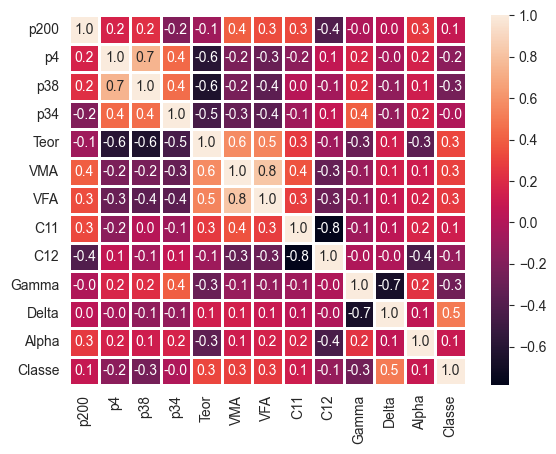

In [247]:
dados_sem_out['Classe'] = df3['Classe']
correlation = dados_sem_out.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=2)
display(plot)

In [248]:
dados_modelo1 = dados_sem_out.filter(['p200','Teor','VMA','C11'])
dados_modelo2 = dados_sem_out.filter(['p200','VMA','C12'])
dados_modelo3 = dados_sem_out.filter(['p34', 'Teor','Gamma'])
dados_modelo4 = dados_sem_out.filter(['p38',	'Teor',	'VMA', 'Delta'])
dados_modelo5 = dados_sem_out.filter(['p200','Teor','Alpha'])
dados_modelo6 = dados_sem_out.filter(['p200','p4','p38','p34','Teor','VMA','VFA', 'Classe'])
l= [dados_modelo1, dados_modelo2,
      dados_modelo3, dados_modelo4, dados_modelo5, dados_modelo6]


for i in l:

    print('var', i.iloc[:,-1].name)
    print('minio',i.iloc[:,-1].min())
    print('maximo',i.iloc[:,-1].max())
    print('media',i.iloc[:,-1].mean())
    print('mediana',i.iloc[:,-1].median())
    print('desvio padrao',i.iloc[:,-1].std())


    X = i.iloc[:,:-1]
    y = i.iloc[:,-1]

    # Divide os dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

    # Cria o modelo de regressão linear
    model = LinearRegression()

    # Treina o modelo com os dados de treinamento
    model.fit(X_train, y_train)

    # Avalia o desempenho do modelo com os dados de teste
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

    # Exibe os resultados
    print('MSE:', mse)
    print('R²:', r2)
    print()

var C11
minio 0.0
maximo 0.3378142814020637
media 0.06604846037203005
mediana 0.040067767359459376
desvio padrao 0.07014009401687585
MSE: 0.002114093245238133
R²: 0.5008680200222309

var C12
minio 0.1394658753709198
maximo 0.9258160237388724
media 0.4070108326480996
mediana 0.413946587537092
desvio padrao 0.13879829809683014
MSE: 0.011166424383543804
R²: 0.49228232782887626

var Gamma
minio 0.0
maximo 0.03251995551575536
media 0.0016285202618138445
mediana 4.717887981631993e-05
desvio padrao 0.00586231297959105
MSE: 1.76438930470819e-06
R²: -45.26203044699054

var Delta
minio 0.24540682414698178
maximo 1.0
media 0.6520017076178731
mediana 0.6607611548556431
desvio padrao 0.14024489393264536
MSE: 0.005062047569024661
R²: 0.11390025590784314

var Alpha
minio 0.06318207926479014
maximo 0.6886846639862148
media 0.3802550812093865
mediana 0.34118322802986767
desvio padrao 0.17849570592436612
MSE: 0.03145510172397945
R²: 0.03631054567138081

var Classe
minio 1
maximo 3
media 1.96385542168674

In [249]:
for i in l:


    print('minimo',i.iloc[:,-1].min())
    print('maximo',i.iloc[:,-1].max())
    print('media',i.iloc[:,-1].mean())
    print('mediana',i.iloc[:,-1].median())
    print('desvio padrao',i.iloc[:,-1].std())
    print('var', i.iloc[:,-1].name)


    X = i.iloc[:,:-1]
    y = i.iloc[:,-1]

    # Divide os dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

    # Cria o modelo de regressão linear
    model = LinearRegression()

    # Treina o modelo com os dados de treinamento
    model.fit(X_train, y_train)

    # Avalia o desempenho do modelo com os dados de teste
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

    # Exibe os resultados
    print('MSE:', mse)
    print('R²:', r2)
    print()

minimo 0.0
maximo 0.3378142814020637
media 0.06604846037203005
mediana 0.040067767359459376
desvio padrao 0.07014009401687585
var C11
MSE: 0.002114093245238133
R²: 0.5008680200222309

minimo 0.1394658753709198
maximo 0.9258160237388724
media 0.4070108326480996
mediana 0.413946587537092
desvio padrao 0.13879829809683014
var C12
MSE: 0.011166424383543804
R²: 0.49228232782887626

minimo 0.0
maximo 0.03251995551575536
media 0.0016285202618138445
mediana 4.717887981631993e-05
desvio padrao 0.00586231297959105
var Gamma
MSE: 1.76438930470819e-06
R²: -45.26203044699054

minimo 0.24540682414698178
maximo 1.0
media 0.6520017076178731
mediana 0.6607611548556431
desvio padrao 0.14024489393264536
var Delta
MSE: 0.005062047569024661
R²: 0.11390025590784314

minimo 0.06318207926479014
maximo 0.6886846639862148
media 0.3802550812093865
mediana 0.34118322802986767
desvio padrao 0.17849570592436612
var Alpha
MSE: 0.03145510172397945
R²: 0.03631054567138081

minimo 1
maximo 3
media 1.963855421686747
med

# Estudo das Variáveis de entrada 

## P200

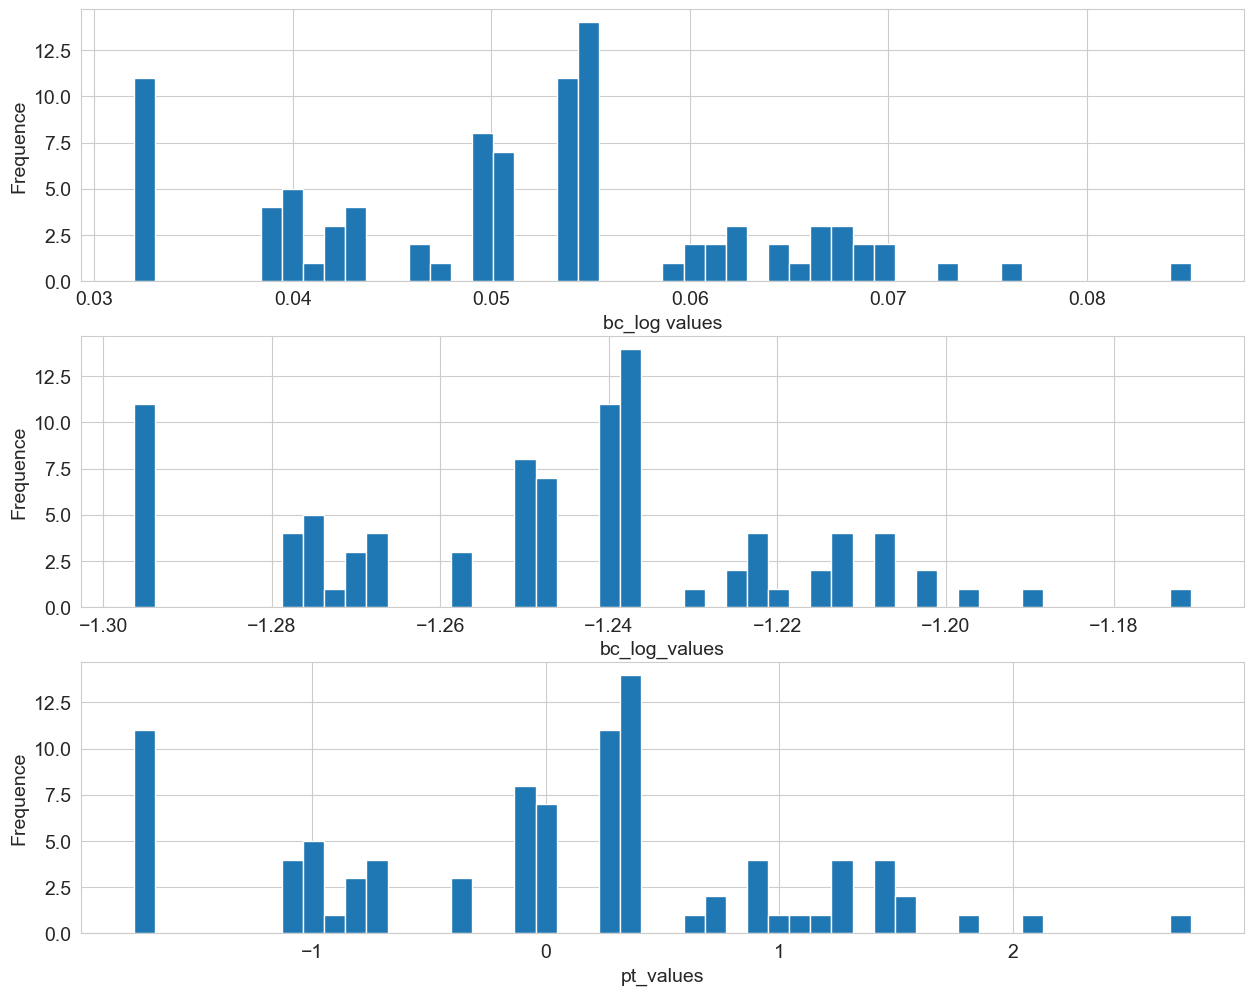

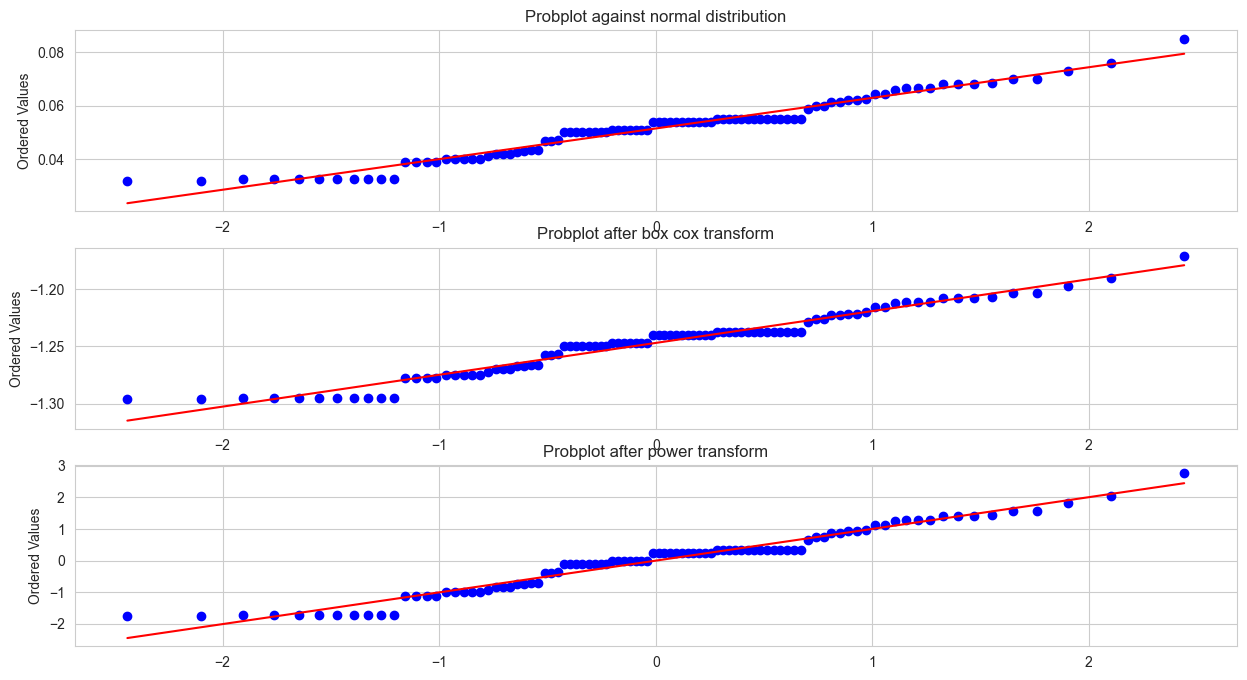

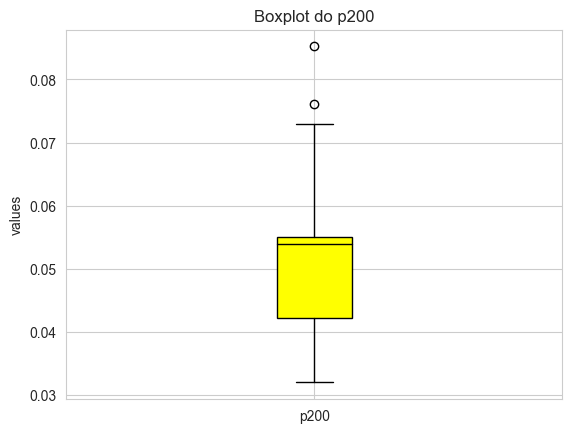

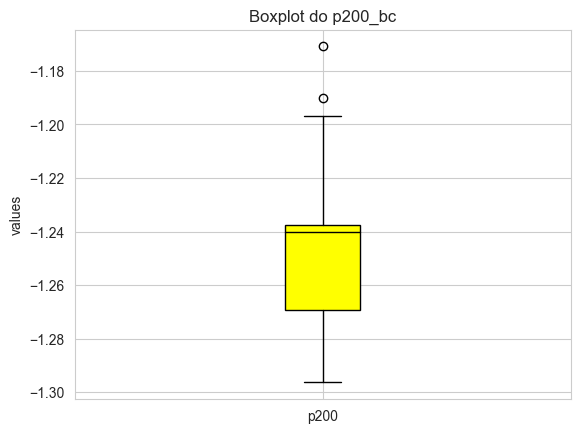

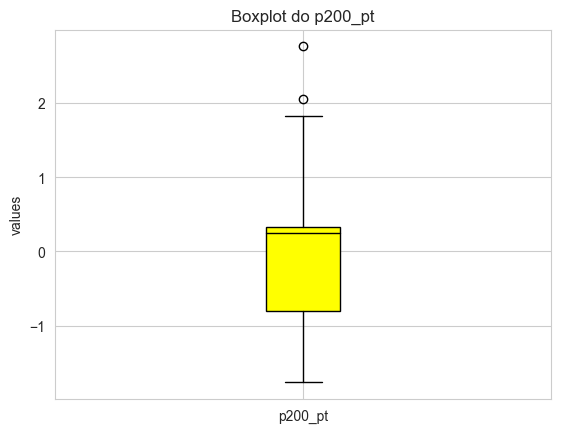

In [250]:
pt = PowerTransformer()
df3['p200_bc'] = pd.Series(stats.boxcox(df3['p200'])[0])
pt.fit(pd.DataFrame(df3['p200']))
p200_pt = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df3['p200']))])

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 12))
df['p200'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df3['p200_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('bc_log_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

p200_pt.hist(ax= ax3, bins = 50)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('pt_values', fontsize=14)
ax3.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 8))
prob1 = stats.probplot(df3['p200'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(df3['p200_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after box cox transform')

prob3 = stats.probplot(p200_pt, dist= 'norm', plot=ax3)
ax3.set_xlabel('')
ax3.set_title('Probplot after power transform')

fig = plt.figure()
plt.boxplot(
    df3["p200"],
    labels=["p200"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p200")
plt.show()

fig = plt.figure()
plt.boxplot(
    df3["p200_bc"],
    labels=["p200"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p200_bc")
plt.show()

fig = plt.figure()
plt.boxplot(
    p200_pt,
    labels=["p200_pt"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p200_pt")
plt.show()


In [251]:
display(df3[df3['p200'] > 0.075])


,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe,p200_bc
36,0.085231,0.493845,0.378421,0.167271,0.050,0.163,0.70,0.000083,0.826,7570000.0,-1.470,3.07,1,-1.170870
72,0.076058,0.439089,0.175869,0.000000,0.047,0.160,0.75,0.004740,0.431,11500000.0,-1.293,2.60,3,-1.190265


## p4

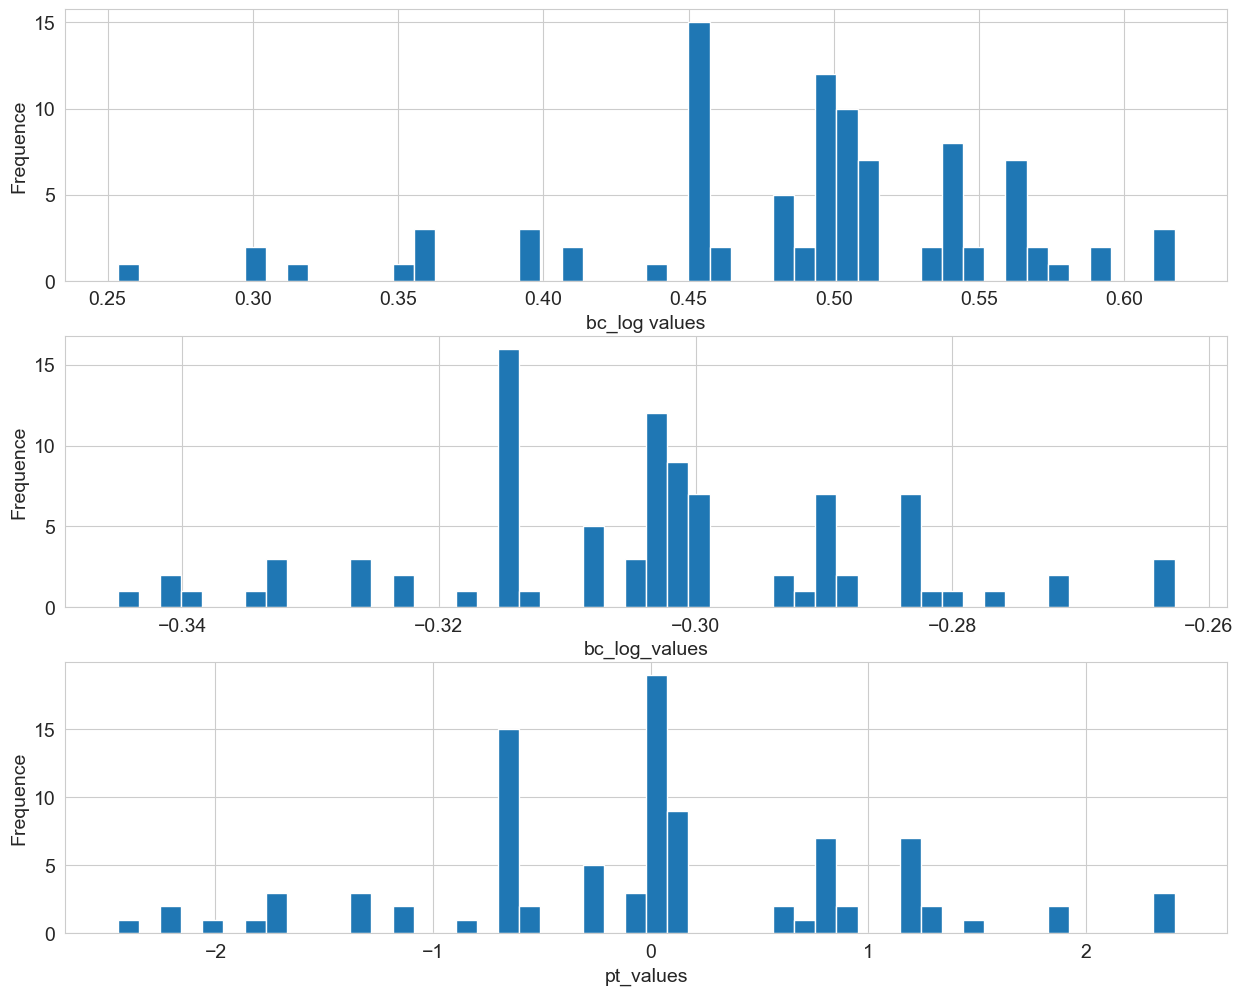

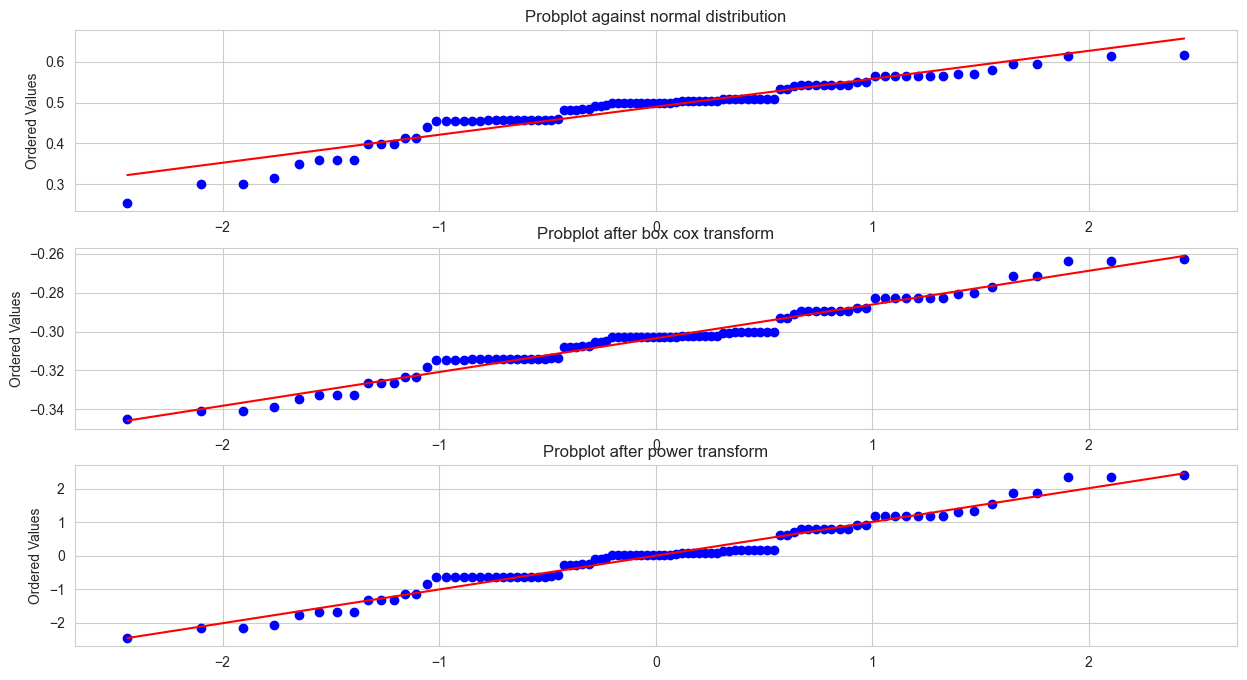

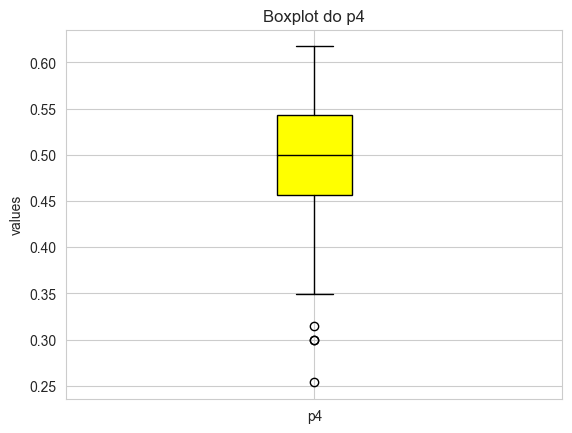

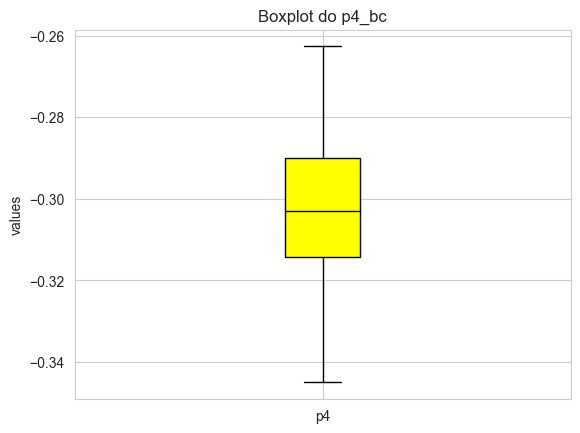

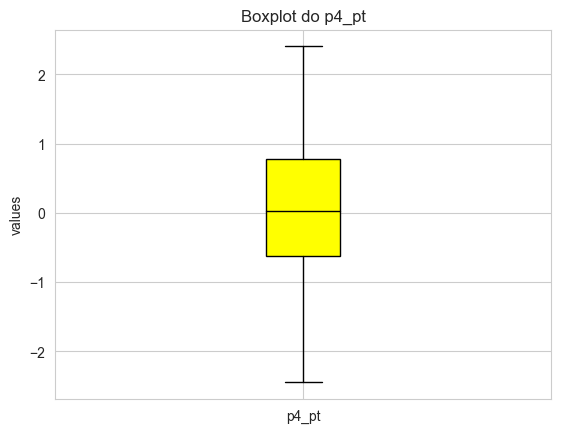

In [252]:
pt = PowerTransformer()
df3['p4_bc'] = pd.Series(stats.boxcox(df3['p4'])[0])
pt.fit(pd.DataFrame(df3['p4']))
p4_pt = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df3['p4']))])

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 12))
df['p4'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df3['p4_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('bc_log_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

p4_pt.hist(ax= ax3, bins = 50)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('pt_values', fontsize=14)
ax3.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 8))
prob1 = stats.probplot(df3['p4'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(df3['p4_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after box cox transform')

prob3 = stats.probplot(p4_pt, dist= 'norm', plot=ax3)
ax3.set_xlabel('')
ax3.set_title('Probplot after power transform')

fig = plt.figure()
plt.boxplot(
    df3["p4"],
    labels=["p4"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p4")
plt.show()

fig = plt.figure()
plt.boxplot(
    df3["p4_bc"],
    labels=["p4"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p4_bc")
plt.show()

fig = plt.figure()
plt.boxplot(
    p4_pt,
    labels=["p4_pt"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p4_pt")
plt.show()


In [253]:
display(df3[df3['p4'] <.34])
print(df3['p4'].min())
print(df3['p38'].min())
print(df3['p34'].min(), df3['p34'].max())
print(df3['Teor'].min())
print(df3['VMA'].min())
print(df3['VFA'].min())

,p200,p4,p38,p34,Teor,VMA,VFA,C11,C12,Gamma,Delta,Alpha,Classe,p200_bc,p4_bc
33,0.0644,0.25352,0.01876,0.000,0.0730,0.174000,0.870000,0.005000,0.422,13600000.0,-1.291,3.410,3,-1.215953,-0.345018
73,0.0587,0.31480,0.13800,0.003,0.0615,0.175000,0.750000,0.000004,1.050,34100000.0,-1.510,3.200,2,-1.229011,-0.338945
84,0.0400,0.30000,0.05000,0.000,0.0576,0.159899,0.748543,0.000213,0.681,25400000.0,-1.527,3.106,2,-1.274861,-0.340635
86,0.0400,0.30000,0.05000,0.000,0.0576,0.159899,0.748543,0.003960,0.437,16200000.0,-1.373,4.341,3,-1.274861,-0.340635


0.25352
0.017455039
0.0 0.167270931
0.0365
0.1313
0.6456


## p38

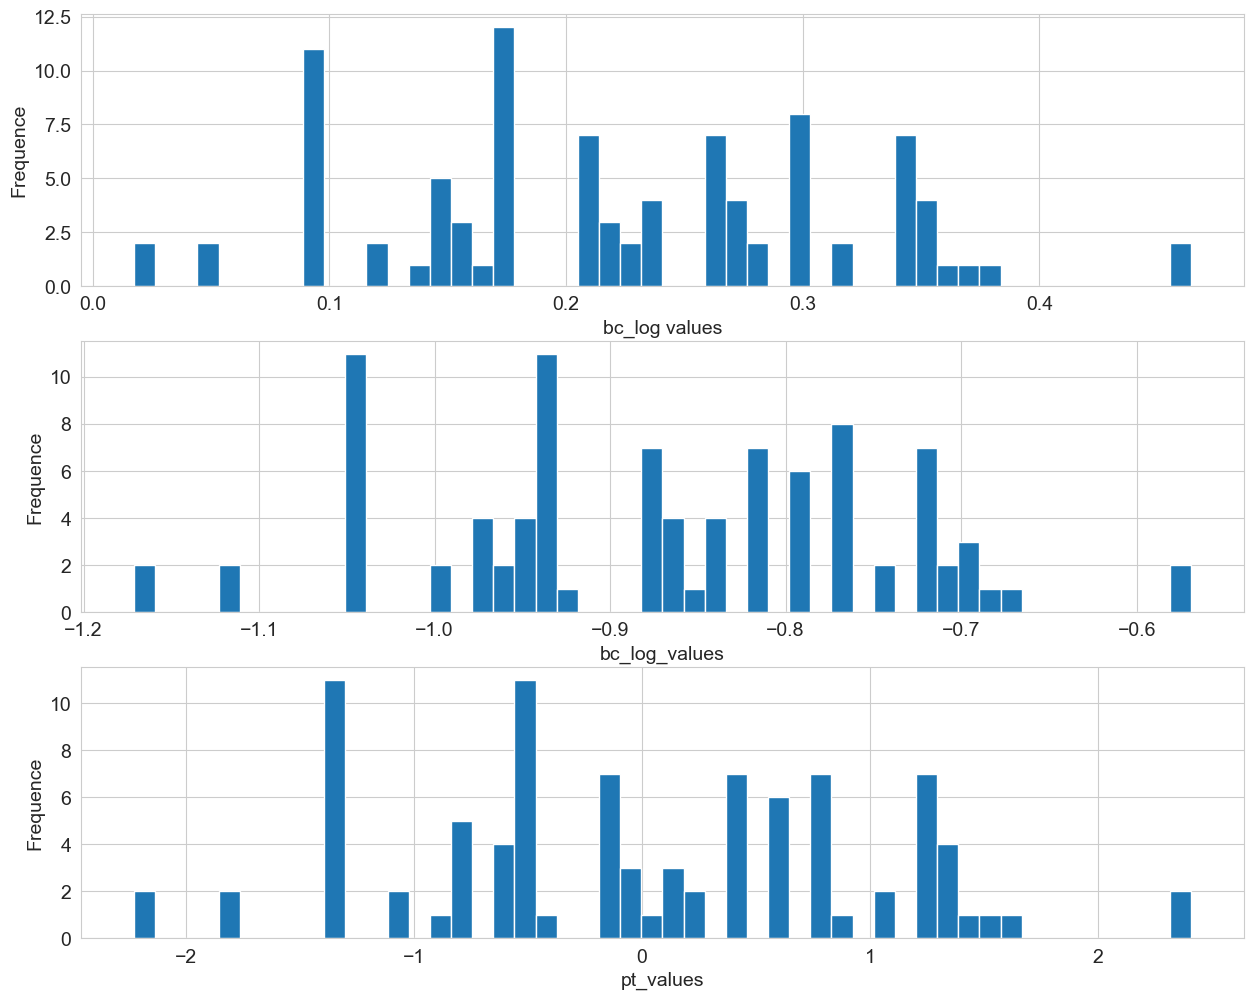

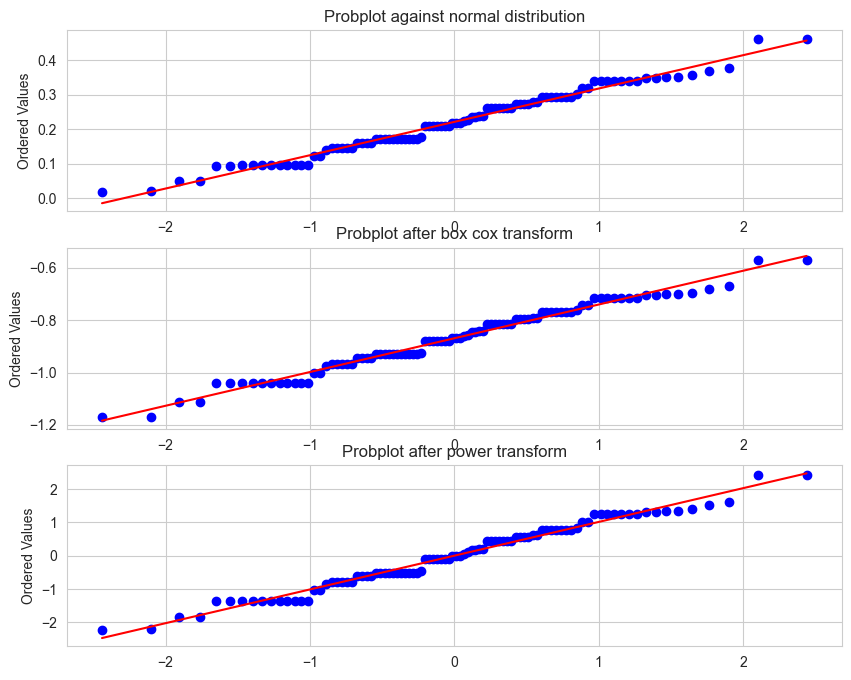

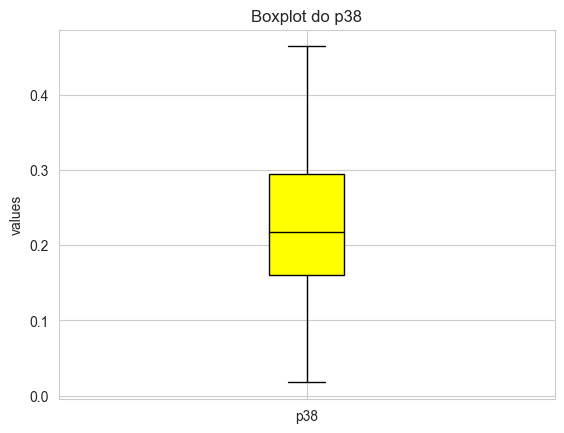

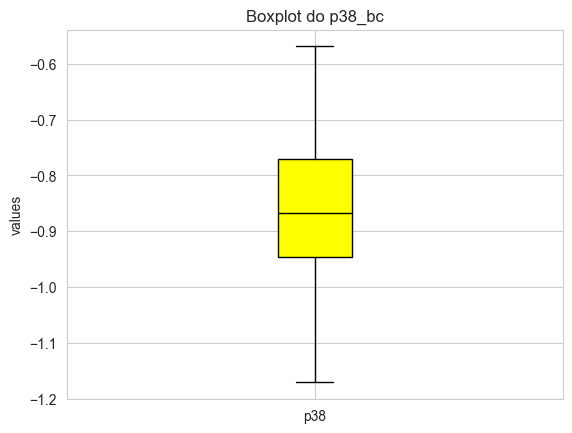

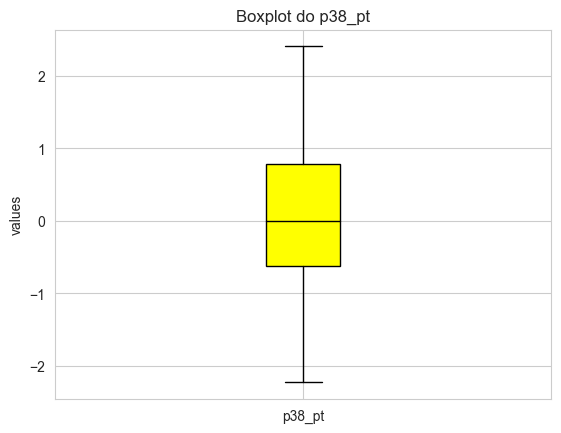

In [254]:
pt = PowerTransformer()
df3['p38_bc'] = pd.Series(stats.boxcox(df3['p38'])[0])
pt.fit(pd.DataFrame(df3['p38']))
p38_pt = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df3['p38']))])

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 12))
df['p38'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df3['p38_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('bc_log_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

p38_pt.hist(ax= ax3, bins = 50)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('pt_values', fontsize=14)
ax3.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 8))
prob1 = stats.probplot(df3['p38'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(df3['p38_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after box cox transform')

prob3 = stats.probplot(p38_pt, dist= 'norm', plot=ax3)
ax3.set_xlabel('')
ax3.set_title('Probplot after power transform')

fig = plt.figure()
plt.boxplot(
    df3["p38"],
    labels=["p38"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p38")
plt.show()

fig = plt.figure()
plt.boxplot(
    df3["p38_bc"],
    labels=["p38"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p38_bc")
plt.show()

fig = plt.figure()
plt.boxplot(
    p38_pt,
    labels=["p38_pt"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p38_pt")
plt.show()


## p34

In [255]:
pt = PowerTransformer()
df3['p34_bc'] = pd.Series(stats.boxcox(df3['p34'])[0])
pt.fit(pd.DataFrame(df3['p34']))
p34_pt = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df3['p34']))])

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 12))
df['p34'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df3['p34_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('bc_log_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

p34_pt.hist(ax= ax3, bins = 50)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('pt_values', fontsize=14)
ax3.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 8))
prob1 = stats.probplot(df3['p34'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(df3['p34_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after box cox transform')

prob3 = stats.probplot(p34_pt, dist= 'norm', plot=ax3)
ax3.set_xlabel('')
ax3.set_title('Probplot after power transform')

fig = plt.figure()
plt.boxplot(
    df3["p34"],
    labels=["p34"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p34")
plt.show()

fig = plt.figure()
plt.boxplot(
    df3["p34_bc"],
    labels=["p34"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p34_bc")
plt.show()

fig = plt.figure()
plt.boxplot(
    p34_pt,
    labels=["p34_pt"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do p34_pt")
plt.show()


ValueError: Data must be positive.

## Teor

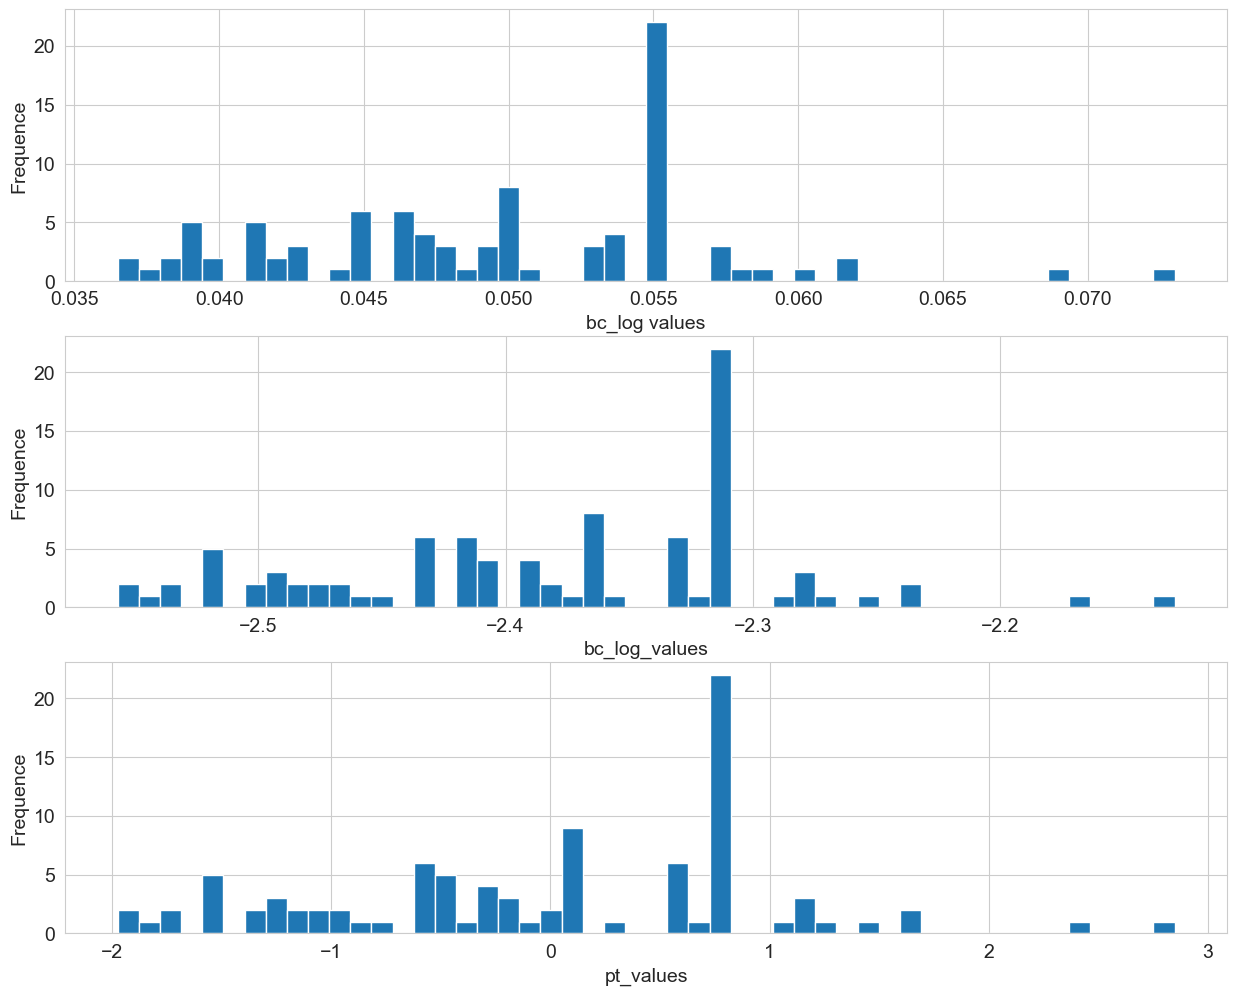

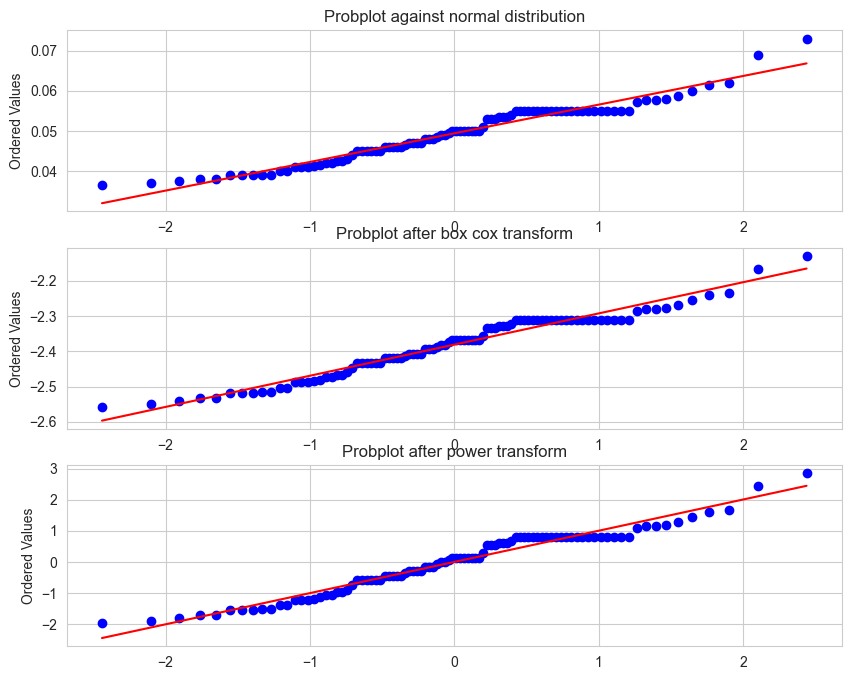

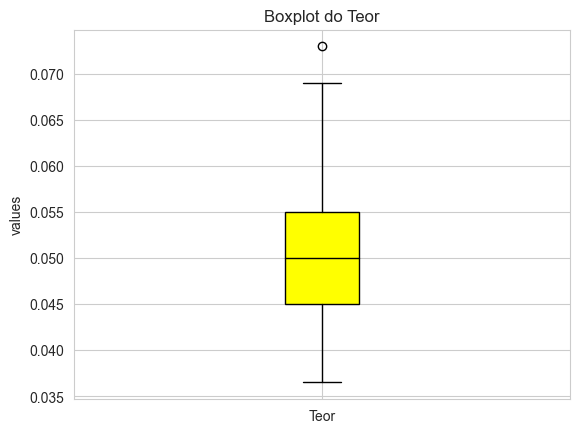

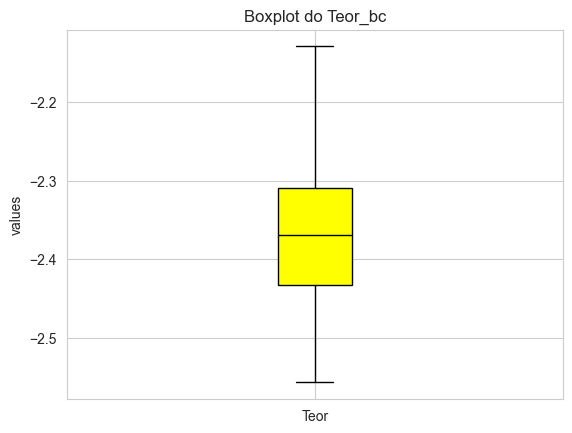

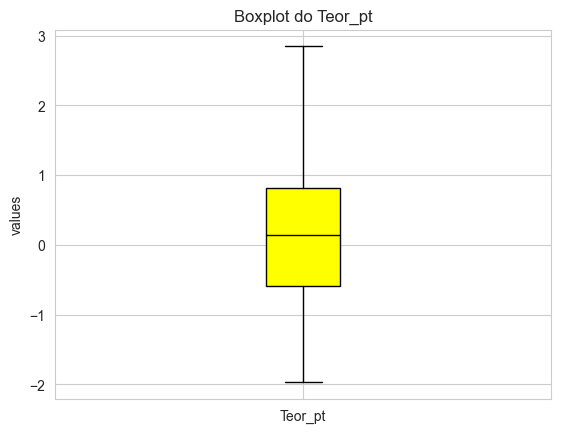

In [ ]:
pt = PowerTransformer()
df3['Teor_bc'] = pd.Series(stats.boxcox(df3['Teor'])[0])
pt.fit(pd.DataFrame(df3['Teor']))
Teor_pt = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df3['Teor']))])

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 12))
df['Teor'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df3['Teor_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('bc_log_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

Teor_pt.hist(ax= ax3, bins = 50)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('pt_values', fontsize=14)
ax3.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 8))
prob1 = stats.probplot(df3['Teor'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(df3['Teor_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after box cox transform')

prob3 = stats.probplot(Teor_pt, dist= 'norm', plot=ax3)
ax3.set_xlabel('')
ax3.set_title('Probplot after power transform')

fig = plt.figure()
plt.boxplot(
    df3["Teor"],
    labels=["Teor"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Teor")
plt.show()

fig = plt.figure()
plt.boxplot(
    df3["Teor_bc"],
    labels=["Teor"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Teor_bc")
plt.show()

fig = plt.figure()
plt.boxplot(
    Teor_pt,
    labels=["Teor_pt"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do Teor_pt")
plt.show()


## VMA

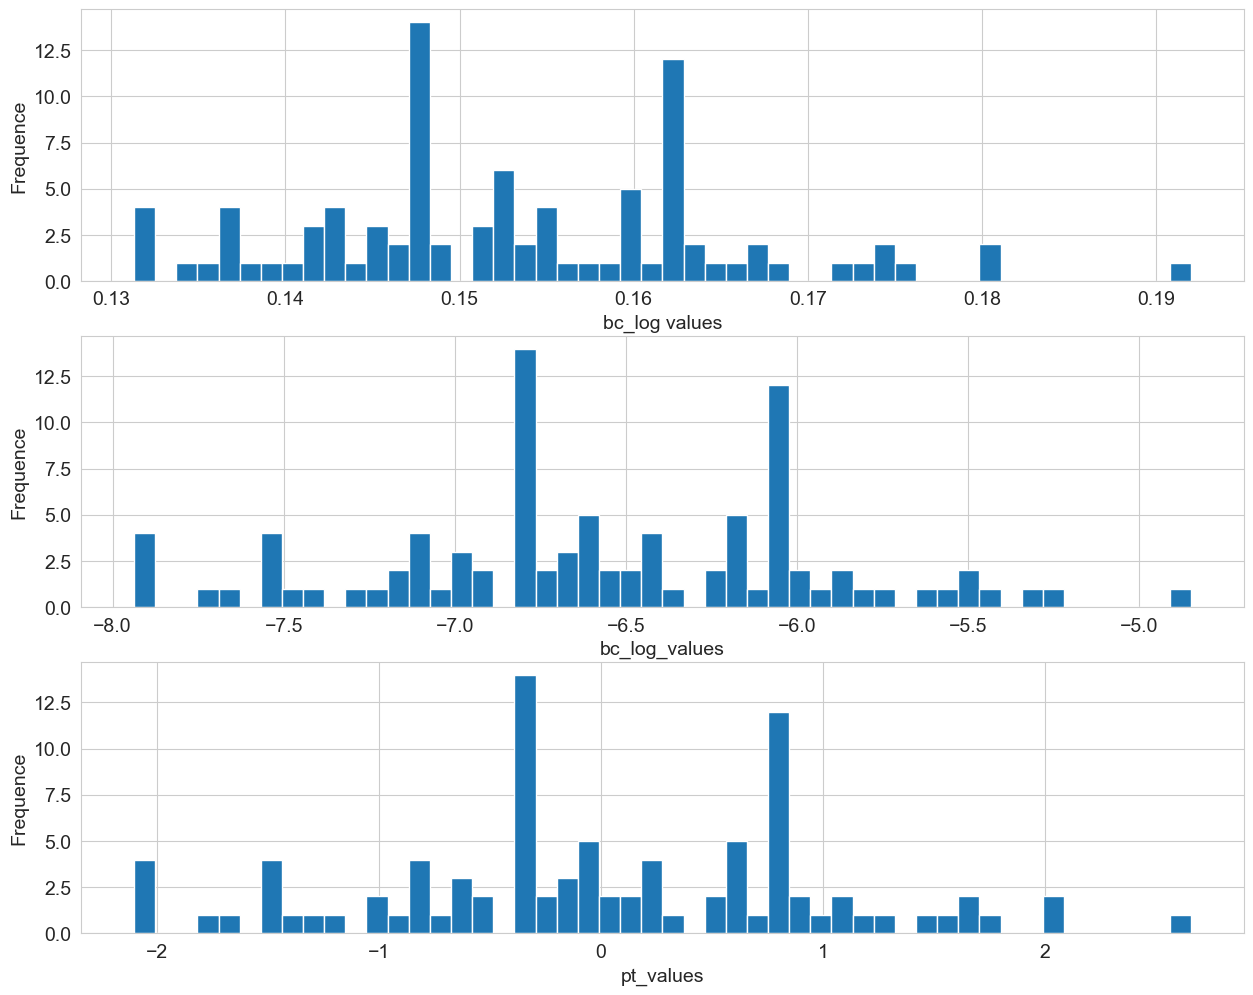

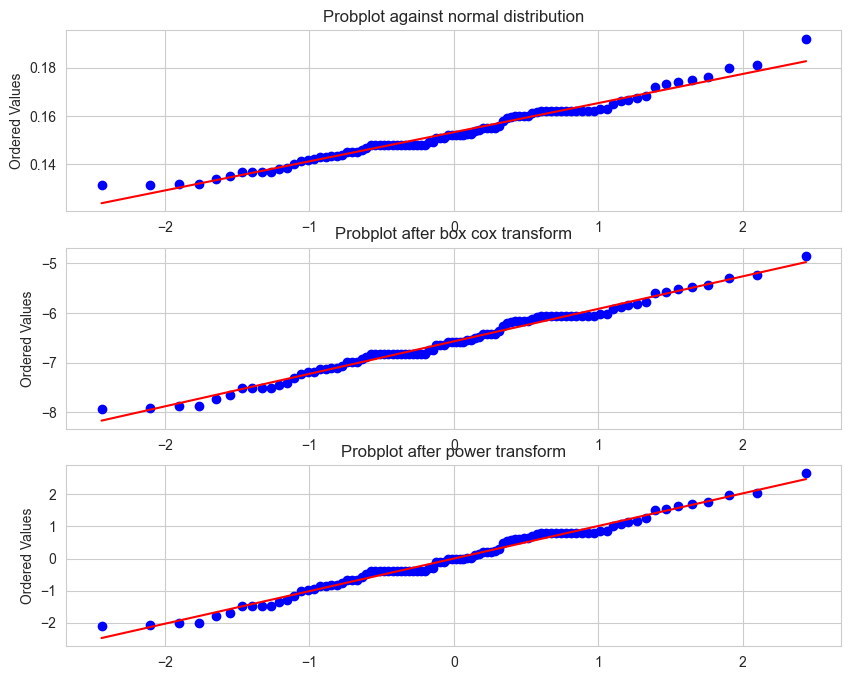

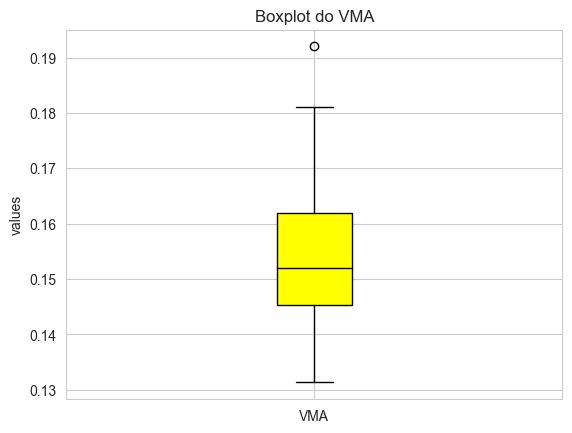

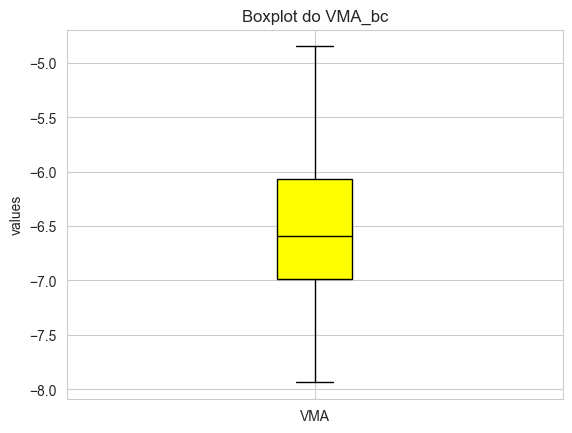

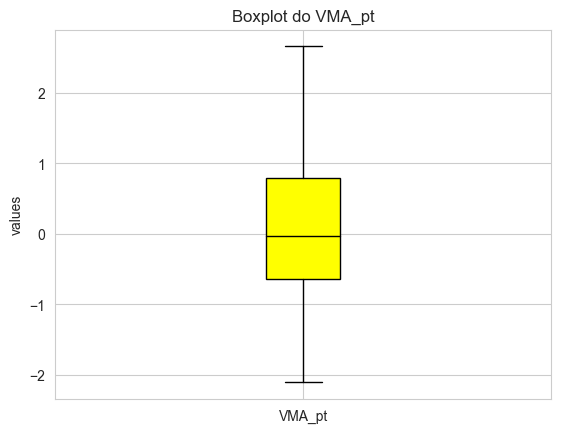

In [ ]:
pt = PowerTransformer()
df3['VMA_bc'] = pd.Series(stats.boxcox(df3['VMA'])[0])
pt.fit(pd.DataFrame(df3['VMA']))
VMA_pt = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df3['VMA']))])

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 12))
df['VMA'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df3['VMA_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('bc_log_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

VMA_pt.hist(ax= ax3, bins = 50)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('pt_values', fontsize=14)
ax3.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 8))
prob1 = stats.probplot(df3['VMA'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(df3['VMA_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after box cox transform')

prob3 = stats.probplot(VMA_pt, dist= 'norm', plot=ax3)
ax3.set_xlabel('')
ax3.set_title('Probplot after power transform')

fig = plt.figure()
plt.boxplot(
    df3["VMA"],
    labels=["VMA"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do VMA")
plt.show()

fig = plt.figure()
plt.boxplot(
    df3["VMA_bc"],
    labels=["VMA"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do VMA_bc")
plt.show()

fig = plt.figure()
plt.boxplot(
    VMA_pt,
    labels=["VMA_pt"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do VMA_pt")
plt.show()


## VFA

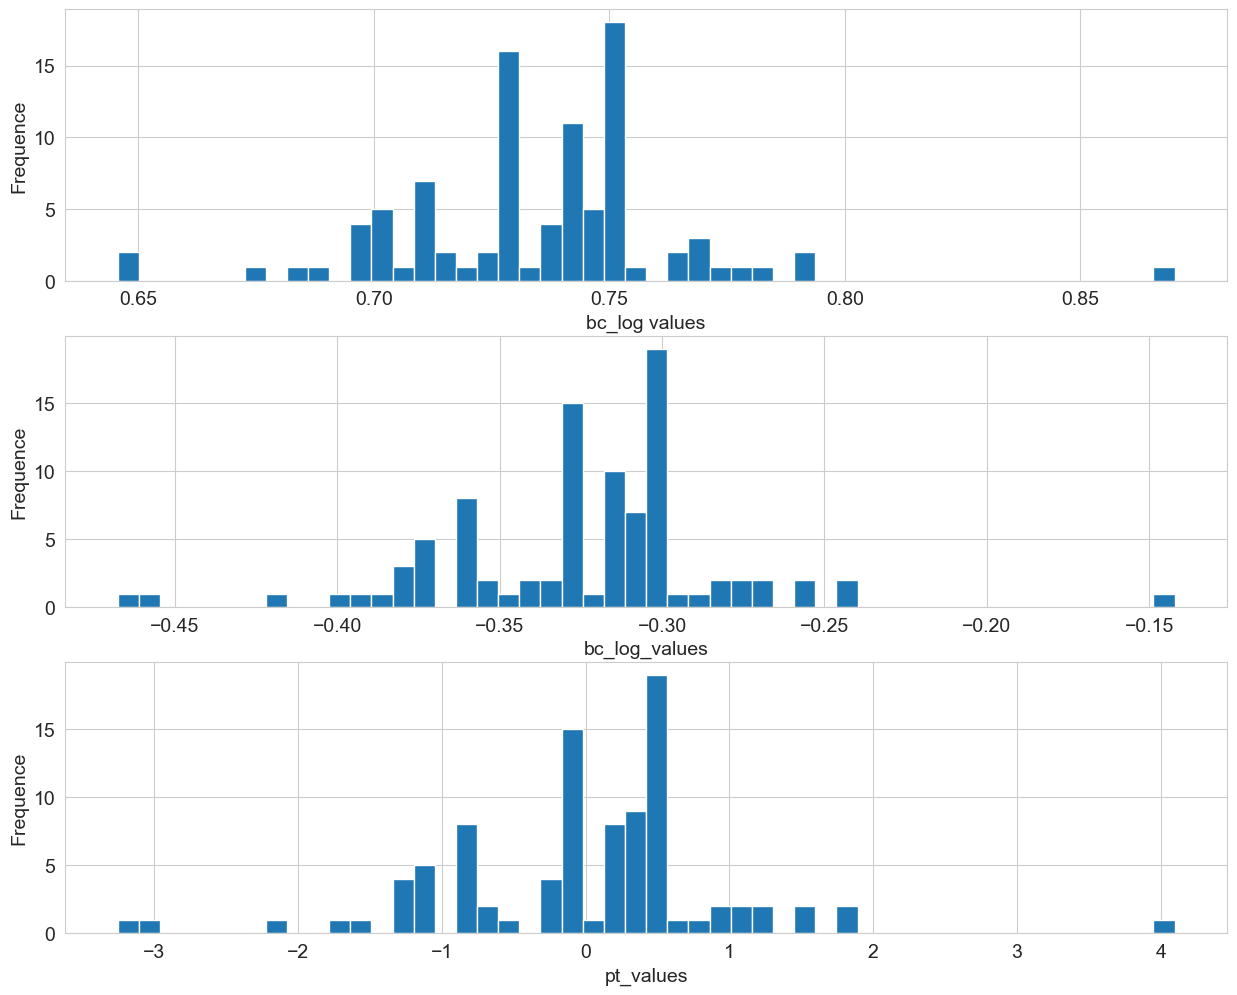

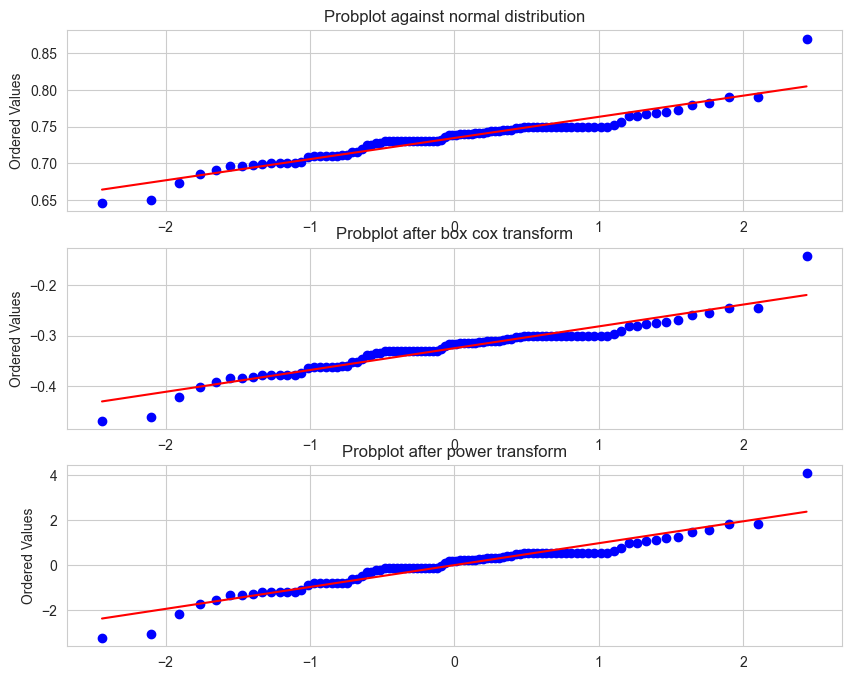

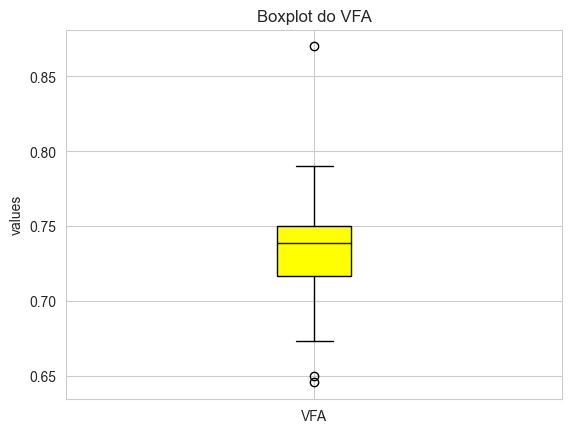

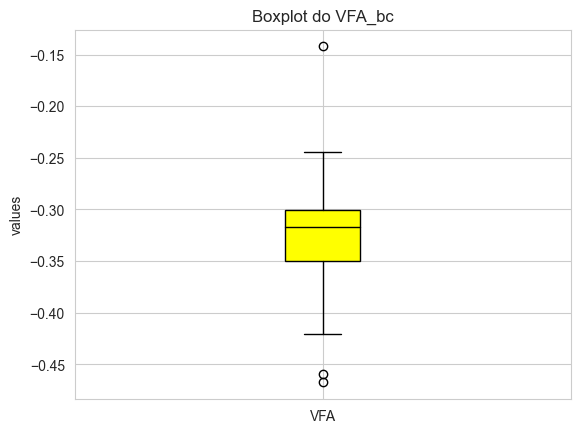

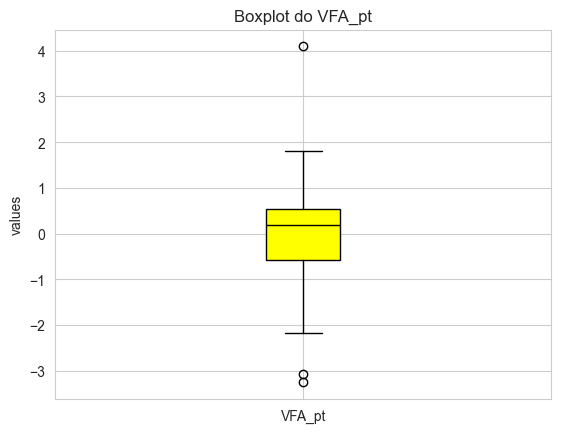

In [ ]:
pt = PowerTransformer()
df3['VFA_bc'] = pd.Series(stats.boxcox(df3['VFA'])[0])
pt.fit(pd.DataFrame(df3['VFA']))
VFA_pt = pd.Series([i[0] for i in pt.transform(pd.DataFrame(df3['VFA']))])

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15, 12))
df['VFA'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('bc_log values', fontsize=14)
ax1.set_ylabel('Frequence', fontsize=14)

df3['VFA_bc'].hist(ax= ax2, bins = 50)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('bc_log_values', fontsize=14)
ax2.set_ylabel('Frequence', fontsize=14)

VFA_pt.hist(ax= ax3, bins = 50)
ax3.tick_params(labelsize=14)
ax3.set_xlabel('pt_values', fontsize=14)
ax3.set_ylabel('Frequence', fontsize=14)

fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 8))
prob1 = stats.probplot(df3['VFA'], dist= 'norm' , plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(df3['VFA_bc'], dist= 'norm', plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after box cox transform')

prob3 = stats.probplot(VFA_pt, dist= 'norm', plot=ax3)
ax3.set_xlabel('')
ax3.set_title('Probplot after power transform')

fig = plt.figure()
plt.boxplot(
    df3["VFA"],
    labels=["VFA"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do VFA")
plt.show()

fig = plt.figure()
plt.boxplot(
    df3["VFA_bc"],
    labels=["VFA"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do VFA_bc")
plt.show()

fig = plt.figure()
plt.boxplot(
    VFA_pt,
    labels=["VFA_pt"],
    patch_artist=True,
    boxprops=dict(facecolor="yellow", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("values")
plt.title("Boxplot do VFA_pt")
plt.show()
